In [1]:
# Navigate to main project directory so damply will work
%cd ../..

/home/bhkuser/bhklab/katy/recist-vs-reality


In [2]:
import pandas as pd
from damply import dirs
from pathlib import Path

from workflow.scripts.utils.visualizers import visualize_2D_segmentations, locate_centre_slice
from workflow.scripts.utils.loaders import load_nifti

# Set dataset to use

In [3]:
dataset_name = "TCIA_RADCURE"
image_cohort = "RADCURE_GTVp"

### Load MedSAM2 results file to find best and worst result to visualize

In [4]:
medsam2_results_summary = pd.read_csv(
    dirs.RESULTS / "medsam2-inference" / image_cohort / "results.csv",
    index_col = "ID"
)
medsam2_results_summary = medsam2_results_summary.sort_values(by="Volume_Dice", ascending=False)
best_result = medsam2_results_summary.iloc[0]
worst_result = medsam2_results_summary.iloc[-1]

### Load the image, ground truth mask, and predicted mask

In [ ]:
def visualize_medsam_result(result: pd.Series,
                            dataset_name: str,
                            image_cohort:str):
    # Set up path to ground truth image and mask directory
    ground_truth_image_dir = dirs.PROCDATA / dataset_name / "images" / f"mit_{image_cohort}" / result.name
    # Get the full paths to the image and mask files
    image_path = list(ground_truth_image_dir.glob("CT_*/*.nii.gz"))[0]
    gt_mask_path = list(ground_truth_image_dir.glob("RTSTRUCT_*/*.nii.gz"))[0]
    # Get full path to the predicted mask file
    predicted_mask_path = dirs.RESULTS / "medsam2-inference" / image_cohort / "masks" / f"{result.name}.nii.gz"

    # Load the images and immediately convert them to numpy arrays for visualization
    image = load_nifti(image_path, convert_to_np_array=True)
    gt_mask = load_nifti(gt_mask_path, convert_to_np_array=True)
    predicted_mask = load_nifti(predicted_mask_path, convert_to_np_array=True)

    centre_slc_ind = locate_centre_slice(gt_mask)

    medsam_overlay = visualize_2D_segmentations(image,
                                ground_truth_mask=gt_mask,
                                slice_index=centre_slc_ind,
                                predicted_mask=predicted_mask,
                                alpha = 0.5,
                                window_level=40.0,
                                window_width=350.0
                                sample_id = result.name,
                                dice=result.Volume_Dice,
                                apl=result.Added_Path_Length,
                                )

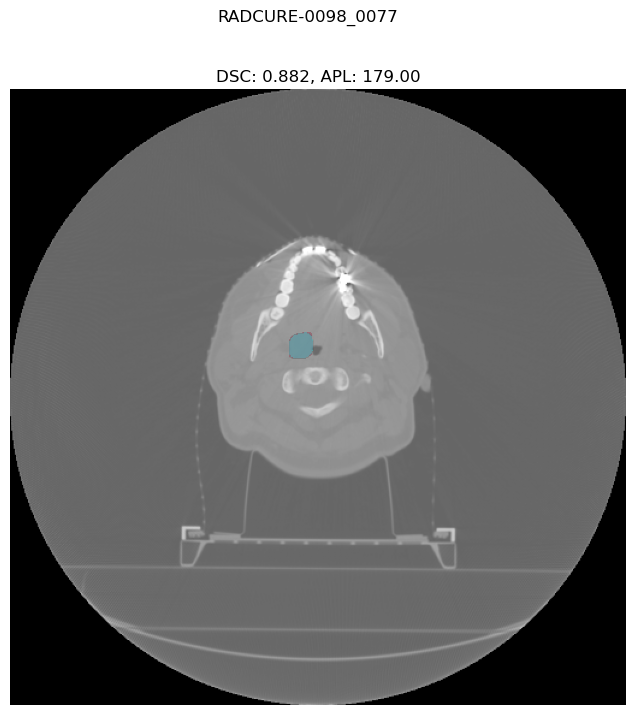

In [6]:
visualize_medsam_result(result = best_result, 
                        dataset_name = dataset_name, 
                        image_cohort = image_cohort)

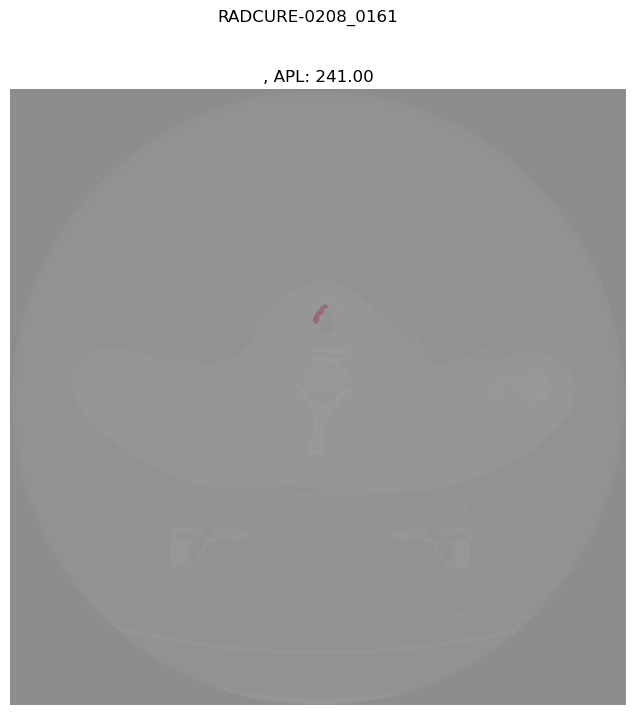

In [7]:
visualize_medsam_result(result = worst_result, 
                        dataset_name = dataset_name, 
                        image_cohort = image_cohort)